<a href="https://colab.research.google.com/github/siddharths067/kerano/blob/master/Convolution_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import backend as K

In [0]:
# For our Visualization Needs
import matplotlib.pyplot as plt

2


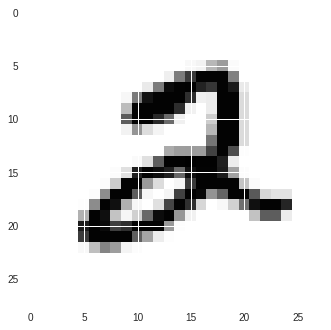

In [40]:
# Load the Data
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


def show_data(index):
  plt.imshow(x_train[index])
  print(y_train[index])
  
show_data(5) 

In [0]:
# Check the format of the data


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)



In [42]:
# format data to categories and normalize images

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# specify model

model = Sequential()
model.add(Conv2D(50, kernel_size=(28, 28),
                 activation='relu',
                 input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [46]:

#fit data


model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 3s 51us/sample - loss: 0.6411 - acc: 0.8050 - val_loss: 0.2267 - val_acc: 0.9298
Epoch 2/12
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3239 - acc: 0.9060 - val_loss: 0.1776 - val_acc: 0.9469
Epoch 3/12
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2697 - acc: 0.9205 - val_loss: 0.1578 - val_acc: 0.9542
Epoch 4/12
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2337 - acc: 0.9299 - val_loss: 0.1430 - val_acc: 0.9567
Epoch 5/12
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2180 - acc: 0.9344 - val_loss: 0.1340 - val_acc: 0.9617
Epoch 6/12
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2062 - acc: 0.9380 - val_loss: 0.1258 - val_acc: 0.9633
Epoch 7/12
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1942 - acc: 0.9422 - val_loss: 0.

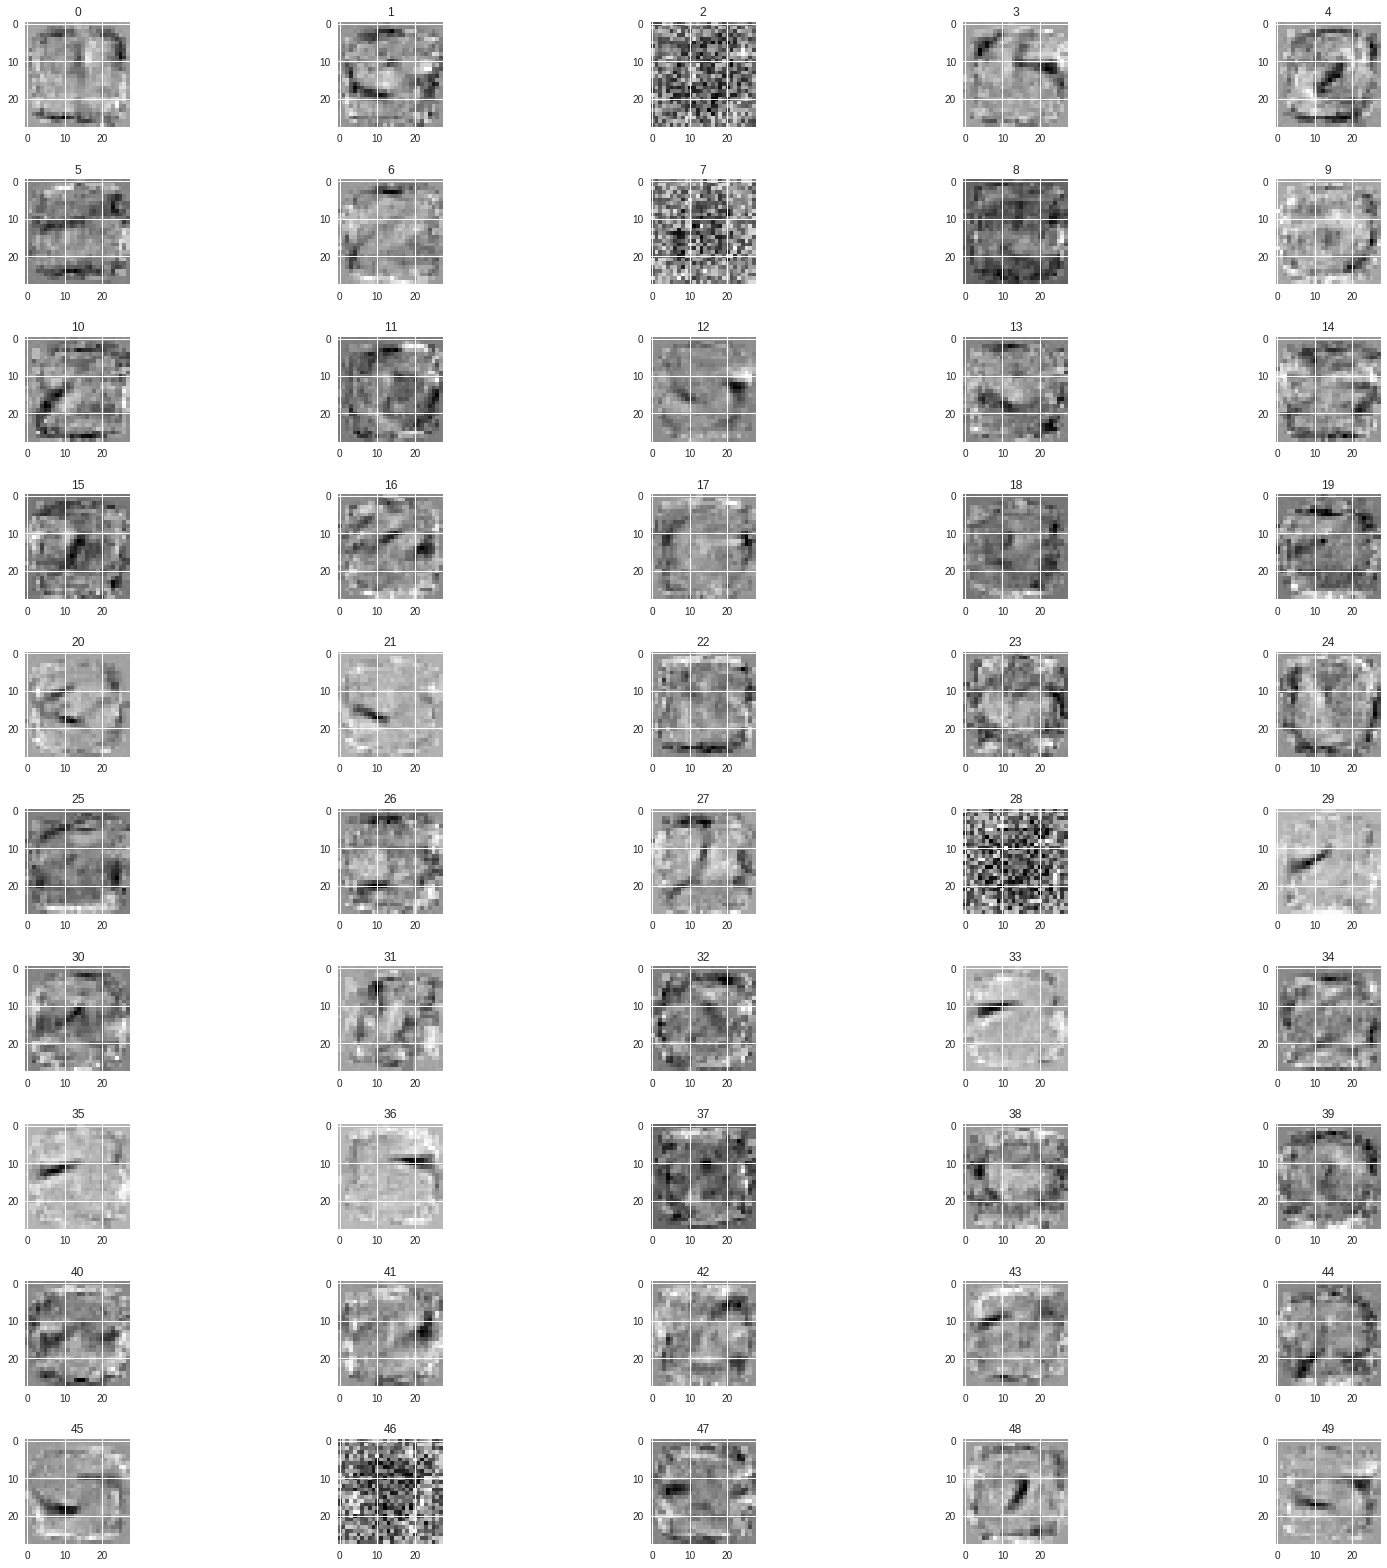

In [47]:
# Plotting convolutional weights 


def plot_conv_weights(modell, layer_index):
    W = modell.get_layer(index=layer_index).get_weights()[0]
    if len(W.shape) == 4:
        #W = np.squeeze(W)
        W = W.reshape((W.shape[0], W.shape[1], W.shape[2]*W.shape[3]))
        fig, axs = plt.subplots(10,5, figsize=(28,28))
        fig.subplots_adjust(hspace = .5, wspace=.001)
        axs = axs.ravel()
        for i in range(50):
            axs[i].imshow(W[:,:,i], cmap='gray')
            axs[i].set_title(str(i))
plot_conv_weights(model, 0)